# Model evaluation



## Introduction and motivation

In my master's thesis I wrote code to automatically detect ellipses in gray-scale images as a minor side project. Back then I had no idea of machine learning and I always wanted to revisit the topic. After recently finishing my MicroMaster in Statistics and Data Science I thought I could try to solve a similar task using a neural network. I build a smaller working sample with a single circle in a image and fully connected feed forward networks. I tried to detect the (x,y) position of the circle center inside the image. That worked well. Then I introduced noise to see how far I could push the model and after that tried to detect the radius as well. In the end, I kind of drifted away from my inital motivation and became more curious how far I could push the model and whether a convolutional neural network could be a better solution for the task. The idea seemed interesting to me as I haven't read to much about using convolutional network for a regression task.

In the end, I ended up comparing two models and their performance for different noise levels. In this analysis, I explain the models I ended up using focus on the model's behavior on the test set.

### Dataset

40000 images have been created using the create_dataset.py. It first created the .png images and zips them together and then deletes the single files for a more compact version. These images are 100 x 100 pixels containing a circle with a random shape (radius r) and position (x,y). 
First the radius is randomly drawn from a uniform distribution between 5 and 15 pixels. The the circle center position is randomly drawn from unform distribution in x and y in border [r,100-r] to avoid not incomplete circles in the images.
The data loader applies a transformation to the pictures in form of a Gaussian noise with zero mean and a standard deviation from here on called noise level. The models are trained different noise levels [0.1, 0.3, 0.5, 0.7, 0.9, 1.1]

#### Flaw in dataset

The center of the circle can be very close to the edges with a distance between 5-15 pixel, yet for this to happen it requires a certain drawn radius. For example: If the radius drawn is 14, then a circle center is only possible in between [14,86] for x and y.
If the radius drawn is 5, then a circle center is possible in between [5,95] for x and y.
This will result in a smaller representation of circles with x or y positions between 5-15 and between 85-95. This could be quantified by a derived density distribution. This flaw is later seen in the histograms. (maybe plot a 3d histogram or heat map of the x,y, positions)


### Visual Inspection

To get an overview of the model's performance, it is useful to showcase the predicted values on the actual images.

* show image where performance is similar between models
* show image where model performance is drastically different


### Histogram of Prediction vs. Label

Plotting the histogram of predicted values and the labels enables to visualize potential weaknesses of the model. Three levels of noise low, medium and high with their values 0.3, 0.7, 1.1 are chosen to create the histograms.
Note: x and y behave very similar and therefore only the diagrams for x are showns here.

### Test Loss during training

The following plots show the average test loss (MSE) during training. The models behave differently for different levels of noise and show different levels of conversion of the 20 epochs.

### MSE for position and shape

Instead of taking the MSE of x,y and r collectively, the MSE is calculated for the test set for the positional variables x,y and the shape variable r independantly to further dive into the models behavior. 




Model evaluation takes place on multiple levels. On sample level, a random sample is drawn and labels and predicted values are compared visually. This allows to gain some intuition of what might be going wrong or not as intended.
On a higher level the histograms of true labels and and predicted labels are compared to detect weaknesses of the model.
Is it more difficult for the model to predict labels fro circles being at the edge of the picture?
How many weights had to be trained vs the amount of available data?



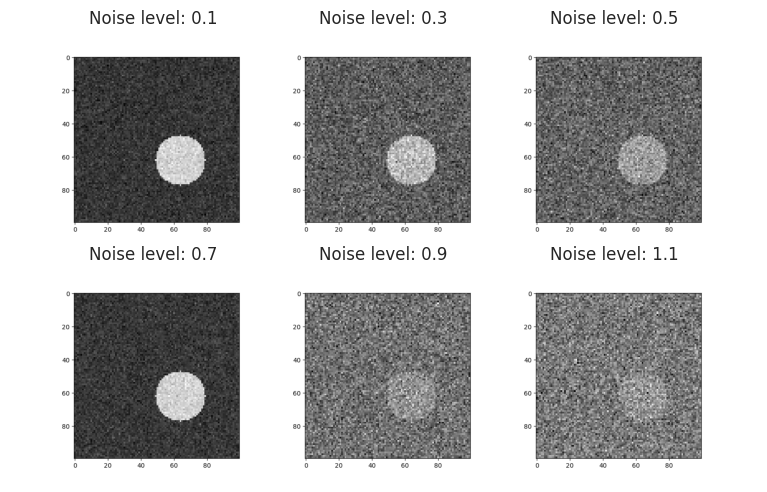

In [79]:

# importing PIL
from PIL import Image
import matplotlib.pyplot as plt
#import libraries 
import cv2 
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

# create figure 
f, axs = plt.subplots(2, 3, figsize=(15, 5))
plt.tight_layout()

noise_levels = np.array([[0.1, 0.3, 0.5],
                        [0.7, 0.9, 1.1]])
# Read image
for i in range(2):
    # Adds a subplot at the 1st position 
    for j in range(3):
        noise = noise_levels[i,j]
        img = cv2.imread(f'./img/img319_{noise}.png') 
        # showing image 
        axs[i,j].imshow(img) 
        axs[i,j].axis('off')
        plt.axis('off') 
        axs[i,j].set_title(f"Noise level: {noise}") 

plt.subplots_adjust(left=0.1, right=0.6, bottom=0.05, top=0.95, wspace=-0.2, hspace=0.1)

    #img = Image.open(f'img319_{noise}.png')
    #axarr[i].imshow(img)
    #axarr[i].axis("off")


In [8]:
df_CNN3_low = pd.read_csv('./models/predictions/predictions_CustomCNN3_state_noise_lvl_0.1.csv')
df_CNN3_mid = pd.read_csv('./models/predictions/predictions_CustomCNN3_state_noise_lvl_0.3.csv')
df_CNN3_high = pd.read_csv('./models/predictions/predictions_CustomCNN3_state_noise_lvl_0.3.csv')

df_low = pd.read_csv('./models/predictions/predictions_CustomCNN3_state_noise_lvl_0.1.csv')
df_mid = pd.read_csv('./models/predictions/predictions_CustomCNN3_state_noise_lvl_0.3.csv')
df_high = pd.read_csv('./models/predictions/predictions_CustomCNN3_state_noise_lvl_0.3.csv')



[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5]


Text(0.5, 1.0, 'Distribution of r \n High noise model 2')

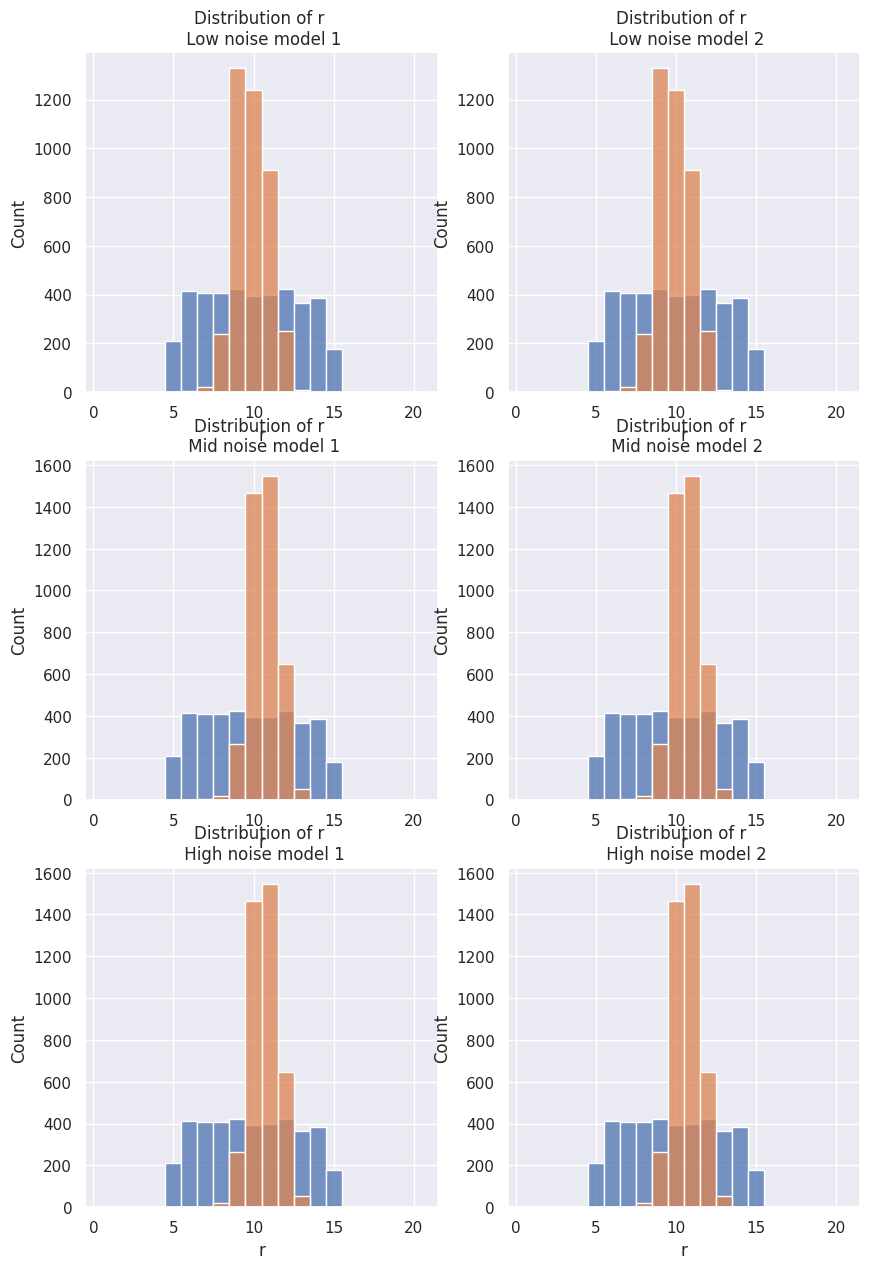

In [80]:

# create figure 
f, axs = plt.subplots(3, 2, figsize=(10, 15))


noise_levels = np.array([[0.1, 0.3, 0.5],
                        [0.7, 0.9, 1.1]])
# Read image

bins = np.linspace(0.5,20.5,21)
print(bins)

# there is a problem in the data creation, x0, y0 should be uniform
sns.histplot(ax = axs[0,0], data = df_CNN3_low, x = 'r',bins = bins,label = 'true label')
sns.histplot(ax = axs[0,0], data = df_CNN3_low, x = 'r_hat',bins = bins,label = 'prediction')
sns.histplot(ax = axs[0,1], data = df_CNN3_low, x = 'r',bins = bins,label = 'true label')
sns.histplot(ax = axs[0,1], data = df_CNN3_low, x = 'r_hat',bins = bins,label = 'prediction')

sns.histplot(ax = axs[1,0], data = df_CNN3_mid, x = 'r',bins = bins,label = 'true label')
sns.histplot(ax = axs[1,0], data = df_CNN3_mid, x = 'r_hat',bins = bins,label = 'prediction')
sns.histplot(ax = axs[1,1], data = df_CNN3_mid, x = 'r',bins = bins,label = 'true label')
sns.histplot(ax = axs[1,1], data = df_CNN3_mid, x = 'r_hat',bins = bins,label = 'prediction')

sns.histplot(ax = axs[2,0], data = df_CNN3_mid, x = 'r',bins = bins,label = 'true label')
sns.histplot(ax = axs[2,0], data = df_CNN3_mid, x = 'r_hat',bins = bins,label = 'prediction')
sns.histplot(ax = axs[2,1], data = df_CNN3_mid, x = 'r',bins = bins,label = 'true label')
sns.histplot(ax = axs[2,1], data = df_CNN3_mid, x = 'r_hat',bins = bins,label = 'prediction')

axs[0,0].set_title('Distribution of r \n Low noise model 1')
axs[0,1].set_title('Distribution of r \n Low noise model 2')
axs[1,0].set_title('Distribution of r \n Mid noise model 1')
axs[1,1].set_title('Distribution of r \n Mid noise model 2')
axs[2,0].set_title('Distribution of r \n High noise model 1')
axs[2,1].set_title('Distribution of r \n High noise model 2')


[  0.5   4.5   8.5  12.5  16.5  20.5  24.5  28.5  32.5  36.5  40.5  44.5
  48.5  52.5  56.5  60.5  64.5  68.5  72.5  76.5  80.5  84.5  88.5  92.5
  96.5 100.5]


Text(0.5, 1.0, 'Distribution of x \n High noise model 2')

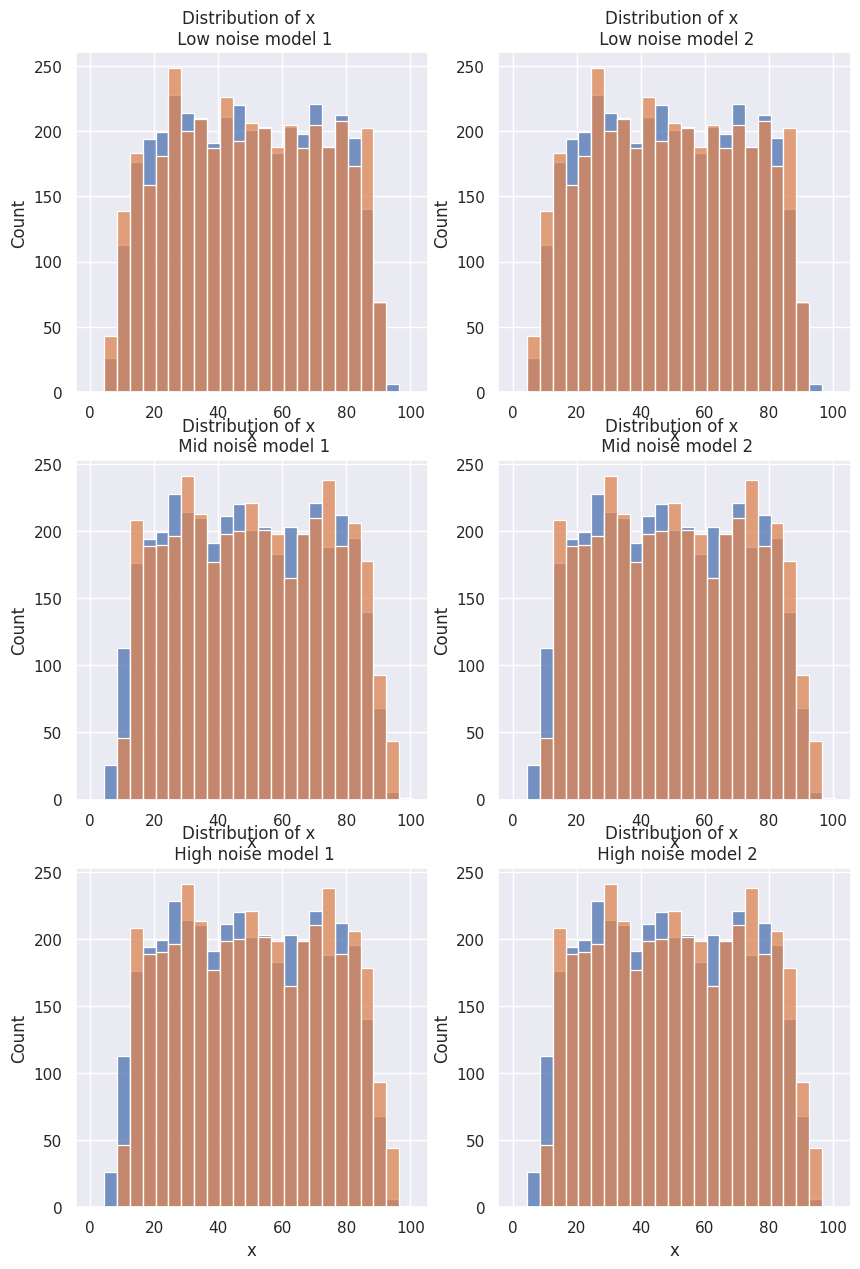

In [81]:
import seaborn as sns
# create figure 
f, axs = plt.subplots(3, 2, figsize=(10, 15))


noise_levels = np.array([[0.1, 0.3, 0.5],
                        [0.7, 0.9, 1.1]])
# Read image

bins = np.linspace(0.5,100.5,51)
bins = np.linspace(0.5,100.5,26)
print(bins)

# there is a problem in the data creation, x0, y0 should be uniform
sns.histplot(ax = axs[0,0], data = df_CNN3_low, x = 'x',bins = bins,label = 'true label')
sns.histplot(ax = axs[0,0], data = df_CNN3_low, x = 'x_hat',bins = bins,label = 'prediction')
sns.histplot(ax = axs[0,1], data = df_CNN3_low, x = 'x',bins = bins,label = 'true label')
sns.histplot(ax = axs[0,1], data = df_CNN3_low, x = 'x_hat',bins = bins,label = 'prediction')

sns.histplot(ax = axs[1,0], data = df_CNN3_mid, x = 'x',bins = bins,label = 'true label')
sns.histplot(ax = axs[1,0], data = df_CNN3_mid, x = 'x_hat',bins = bins,label = 'prediction')
sns.histplot(ax = axs[1,1], data = df_CNN3_mid, x = 'x',bins = bins,label = 'true label')
sns.histplot(ax = axs[1,1], data = df_CNN3_mid, x = 'x_hat',bins = bins,label = 'prediction')

sns.histplot(ax = axs[2,0], data = df_CNN3_mid, x = 'x',bins = bins,label = 'true label')
sns.histplot(ax = axs[2,0], data = df_CNN3_mid, x = 'x_hat',bins = bins,label = 'prediction')
sns.histplot(ax = axs[2,1], data = df_CNN3_mid, x = 'x',bins = bins,label = 'true label')
sns.histplot(ax = axs[2,1], data = df_CNN3_mid, x = 'x_hat',bins = bins,label = 'prediction')

axs[0,0].set_title('Distribution of x \n Low noise model 1')
axs[0,1].set_title('Distribution of x \n Low noise model 2')
axs[1,0].set_title('Distribution of x \n Mid noise model 1')
axs[1,1].set_title('Distribution of x \n Mid noise model 2')
axs[2,0].set_title('Distribution of x \n High noise model 1')
axs[2,1].set_title('Distribution of x \n High noise model 2')


# Comparison of MSE per variable

In [82]:
from sklearn.metrics import root_mean_squared_error,mean_squared_error 
import glob
import os

noise_levels = [0.1,0.3]
#concat all predictions of models
pred_CNN3 = pd.concat((pd.read_csv(f'./models/predictions/predictions_CustomCNN3_state_noise_lvl_{noise_lvl}.csv') for noise_lvl in noise_levels), ignore_index=True)

# calculate the MSE for each variable independantly
rmse_df_CNN3 = pd.DataFrame({'x':np.nan,'y':np.nan,'r':np.nan},index=noise_levels)
for noise_lvl in noise_levels:
    idx = pred_CNN3['noise']== noise_lvl
    rmse_df_CNN3.loc[noise_lvl,'x'] = root_mean_squared_error(pred_CNN3.loc[idx]['x'],pred_CNN3.loc[idx]['x_hat'])
    rmse_df_CNN3.loc[noise_lvl,'y'] = root_mean_squared_error(pred_CNN3.loc[idx]['y'],pred_CNN3.loc[idx]['y_hat'])
    rmse_df_CNN3.loc[noise_lvl,'r'] = root_mean_squared_error(pred_CNN3.loc[idx]['r'],pred_CNN3.loc[idx]['r_hat'])
    

#mse_df_CNN3 = mse_df_CNN3.rename_axis('noise').reset_index()
rmse_df_CNN3


,x,y,r
0.1,2.050488,1.804924,2.089856
0.3,3.064433,2.946014,2.664676


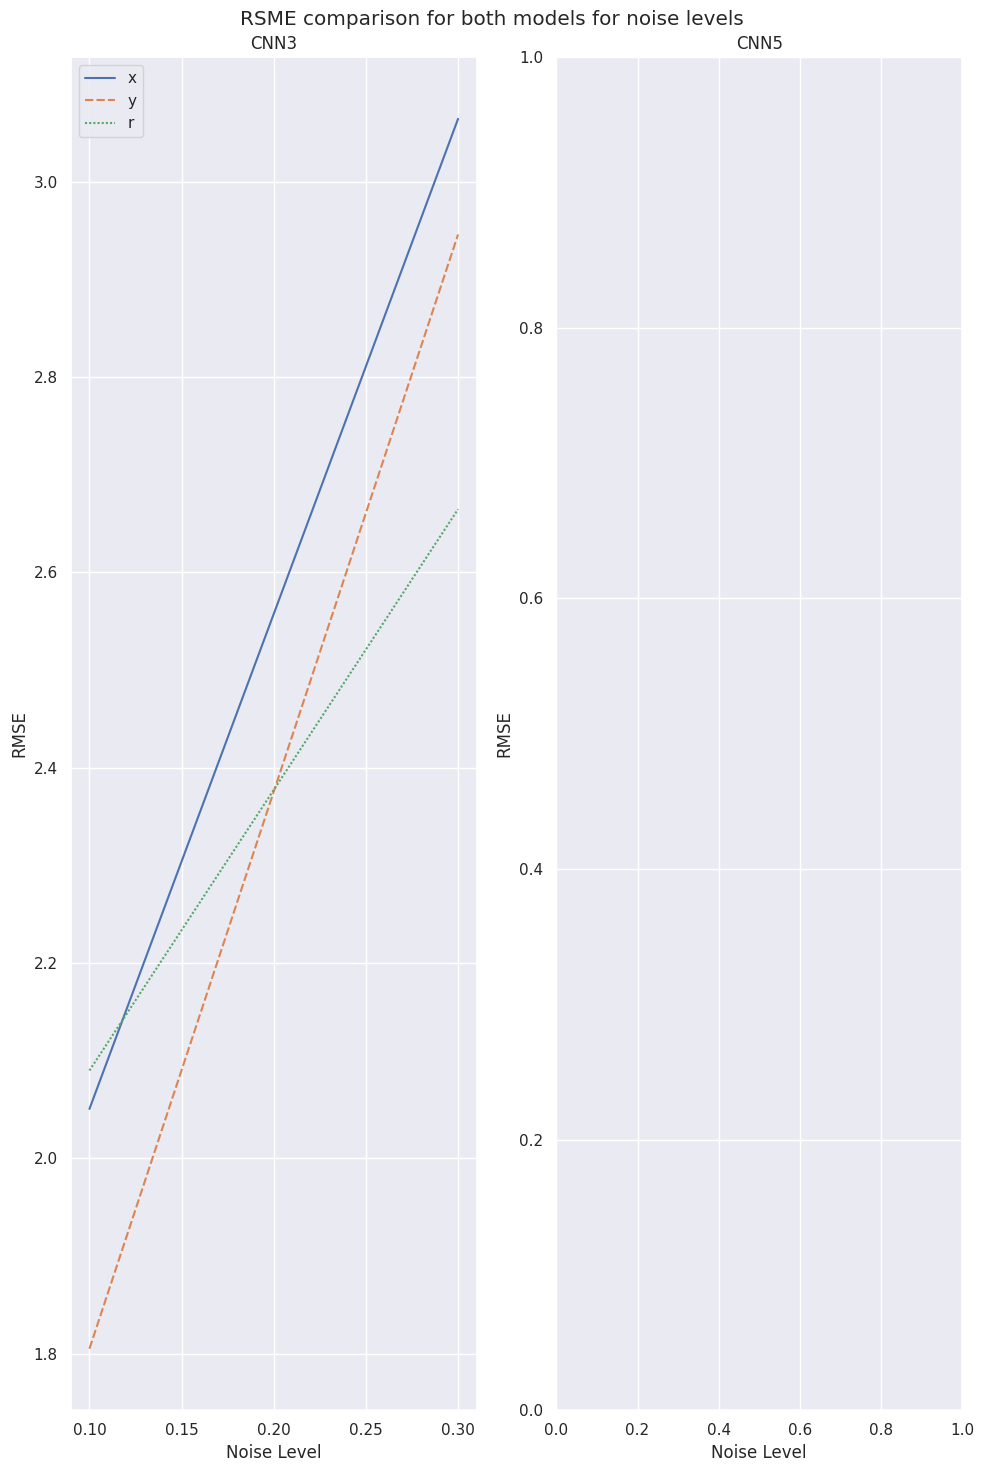

In [93]:
# plotting MSE
f, axs = plt.subplots(1, 2, figsize=(10, 15))
sns.lineplot(ax=axs[0],data=rmse_df_CNN3[['x', 'y', 'r']])
axs[0].set_xlabel('Noise Level')
axs[1].set_xlabel('Noise Level')
axs[0].set_ylabel('RMSE')
axs[1].set_ylabel('RMSE')
axs[0].set_title('CNN3')
axs[1].set_title('CNN5')
plt.suptitle('RSME comparison for both models for noise levels')
plt.tight_layout()
#sns.lineplot(ax= axs[0], data = mse_df_CNN3, x = 'noise',y =['x','y'])

In [ ]:
import torch
import networks
model = networks.CustomCNN2()
model.load_state_dict(torch.load('CustomCNN2_state_noise_lvl_0.7.pt'))

model.eval()

CustomCNN2(
  (L1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (L2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (L3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (L4): Sequential(
    (0): Conv2d(128, 4, kernel_size=(1, 1), stride=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import os
import pandas as pd
from torchvision.io import read_image
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import Circle
import utils
import networks

In [ ]:


# define the train and val splits
train_split = 0.80
test_split = 1 - train_split

noise_lvl = 0.1

#add gassian noise to training data
data_set = utils.CustomImageDataset(annotations_file="./data/annotations.csv",img_dir="./data",transform=transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    utils.AddGaussianNoise(mean = 0, std = noise_lvl)]))

# set number of training samples
numTrainingSamples = int(len(data_set) * train_split)
# set number of test samples
numTestSamples = int(len(data_set) - numTrainingSamples)
print(numTestSamples, numTrainingSamples)
# draw randomly from data
(trainData, testData) = random_split(data_set,
	[numTrainingSamples, numTestSamples],
	generator=torch.Generator().manual_seed(42))

4000 16000


In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(device)

cpu


In [ ]:
test_dataloader = DataLoader(testData, batch_size=1, shuffle=False)
model.eval()
size = len(test_dataloader.dataset)
num_batches = len(test_dataloader)
test_loss, correct = 0, 0
predictions = np.zeros([size,3])
labels = np.zeros([size,3])
# Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
# also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
with torch.no_grad():
    i = 0
    for X, label in test_dataloader:
        
        X = X.to(device)
        labels[i,:]=label
        label = label.to(device)
        pred = torch.squeeze(model(X))
        predictions[i,:]=(pred.numpy())

        #predictions.append(pred.numpy())
        i += 1 

In [ ]:
predictions = np.round(predictions)
predictions_df = pd.DataFrame({'image':testData.indices,'x_hat': predictions[:,0],'y_hat':predictions[:,1], 'r_hat':predictions[:,2],'x': labels[:,0],'y': labels[:,1], 'r':labels[:,2]})
predictions_df.tail()


,image,x_hat,y_hat,r_hat,x,y,r
3995,89,0.0,0.0,0.0,15.0,79.0,10.0
3996,15746,0.0,0.0,0.0,65.0,80.0,10.0
3997,9753,0.0,0.0,0.0,77.0,74.0,14.0
3998,6371,0.0,0.0,0.0,46.0,49.0,6.0
3999,9214,0.0,0.0,0.0,85.0,77.0,8.0


In [ ]:
a = torch.tensor([86.8129, 91.4636, 17.3889])
a.numpy()


array([86.8129, 91.4636, 17.3889], dtype=float32)

In [ ]:
# single value random evaluation
model.eval() # what is that
eval_id = torch.randint(len(testData), size=(1,)).item()
X, x0 = testData[eval_id][0], testData[eval_id][1]
with torch.no_grad():
    X = X.unsqueeze(1)
    X = X.to(device)
    pred = model(X)
    predicted, actual = pred, x0
    print(f'Predicted: "{predicted}", Actual: "{actual}"')


Predicted: "tensor([[86.2382, 90.8944, 17.2666]])", Actual: "[62. 64. 15.]"


<Figure size 800x800 with 0 Axes>

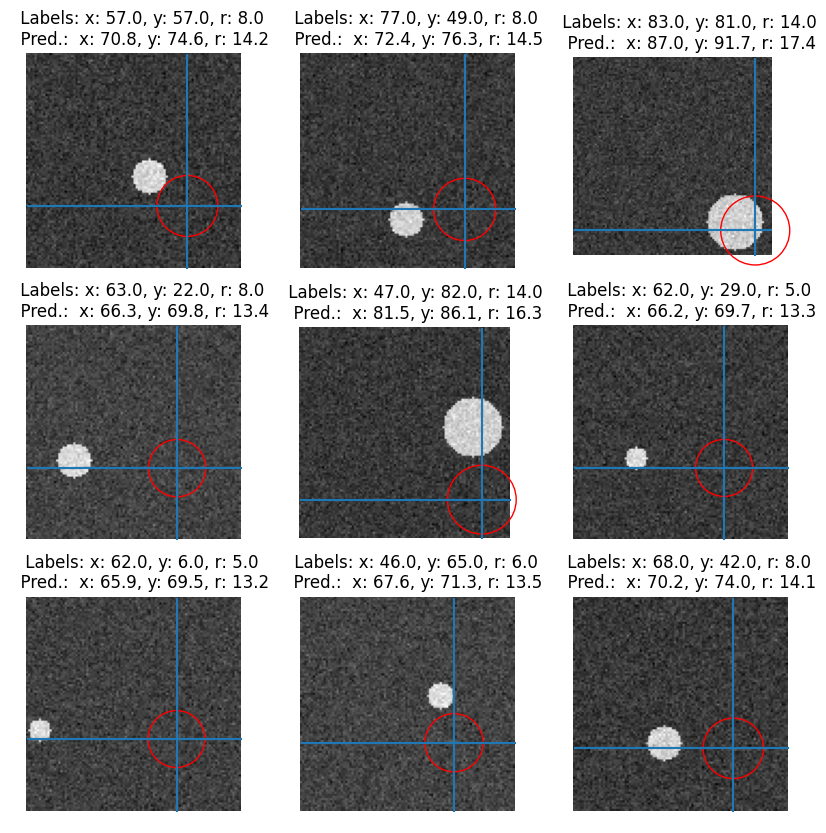

In [ ]:
# visualize the model performance using the images

# set up a canvas of 3 x 3 subplots
plt.rcParams['figure.figsize'] = [10, 10]
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
fig, axes = plt.subplots( rows, cols )

# plot image and prediction
for i in range(rows):
   for j in range(cols):
      # get random index of test sample
      sample_idx = torch.randint(len(testData), size=(1,)).item()
      # get random test sample
      img, label = testData[sample_idx]
      # whats happening here???
      img.unsqueeze_(1)
      # set image to device
      img = img.to(device)
      # get prediction vector (x,y,r) from model
      pred = model(img).squeeze()
      # what does .item() do ???
      x_pred, y_pred, r_pred = pred[0].item(), pred[1].item(), pred[2].item()

      img = img.to('cpu')
      # figure.add_subplot(rows, cols, i)
      axes[i,j].set_title(f" Labels: x: {label[0]}, y: {label[1]}, r: {label[2]}\n  Pred.:  x: {x_pred:.1f}, y: {y_pred:.1f}, r: {r_pred:.1f}")
      axes[i,j].axis("off")
      axes[i,j].imshow(img.squeeze(), cmap="gray") #what does this do???
      axes[i,j].hlines([x_pred,x_pred],0,100)
      axes[i,j].vlines([y_pred,y_pred],0,100)
      circ = Circle((y_pred,x_pred),r_pred,fill = False, edgecolor = "r")
      axes[i,j].add_patch(circ)


# Outlook

I would really like to come back to this project and visit the issue of the different scale for the radius and the (x,y) position. 
(Does the radius have a worse performance than the position?) I feel like x, y are a bigger driver for backwards propagation. Maybe a split model suggested like in this paper could increase performance. This could treat radius and position differently, which could open up the potential for a model with less depth (less parameters) and therefor short training time.
https://www.researchgate.net/publication/355760763_Using_deep_learning_to_predict_the_East_Asian_summer_monsoon

Feel free to reach out to me. I am open to discuss my work and I would also love to hear from people that have more expertise on that matter.
